In [1]:
num_of_lines=2600
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dataset cleaning

In [2]:
Demo_metabolic=pd.read_excel("Demo_metabolic.xlsx", engine='openpyxl')
Demo_patient_week1_23=pd.read_excel("Demo_patient_week1_23.12.xlsx", engine='openpyxl')
Demo_Patient_level_feeding_Daily_19 = pd.read_csv("Demo_Patient_level_feeding_Daily_19.11.csv",encoding='latin-1')

Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :3])
dataap1 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, :1])
dataap2 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, 43:45])

#data2['Weight_adm']=data2['Weight_adm']/data2['Height']
#data2= pd.DataFrame(data2.iloc[:10, :2])

Demo_patient_week1_23=pd.concat([dataap1,dataap2],axis=1)

Demo_patient_week1_23.head()

,patient_id,LOS,outcome1
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,18.0,No
1,002B9175-E697-4308-904F-243B4074C224,9.0,No
2,002E7282-9C02-4D5C-8D3B-DDA2574ABCEF,5.0,No
3,0030B684-28EE-4076-B8D1-B0CEDB9413F3,2.0,No
4,004E2D79-7F96-431B-AA0E-3A6D5B90097D,4.0,No


In [3]:
Demo_Patient_level_feeding_Daily_19 = pd.DataFrame(Demo_Patient_level_feeding_Daily_19.iloc[:num_of_lines, :])
#data.head()

#merge by id
mer = pd.merge(Demo_metabolic,Demo_Patient_level_feeding_Daily_19,left_on='patient_id',right_on='patient_id',how='left')
mer.head()

,patient_id,Weight_adm,Height,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,120.0,2.00,635.580000,33.858000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1878.55,88.891,1526.40,57.6,1526.40000,57.600000
1,243B4074C224,65.0,1.65,983.200008,65.546667,1253.600016,83.573334,1620.000000,108.000000,1021.200036,68.080002,1431.000000,95.400000,1440.00,96.000,1440.00,96.0,1440.00000,96.000000
2,DDA2574ABCEF,101.0,1.75,1209.600024,80.640002,0.000000,0.000000,1359.710689,66.328712,1878.261696,125.217446,643.043760,42.869584,0.00,0.000,0.00,0.0,0.00000,0.000000
3,B0CEDB9413F3,85.0,1.65,1261.400000,47.600000,337.080000,12.720000,36.746660,1.386666,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.0,0.00000,0.000000
4,3A6D5B90097D,70.0,1.75,1114.186815,40.269895,1946.950636,96.729665,1896.193822,100.402857,1970.866173,76.641677,432.479894,16.319996,0.00,0.000,1290.02,58.3,134.97333,5.653333


In [4]:
#onley kcal_day and protein_day
mer2 = pd.DataFrame(mer.iloc[:,3 :])

# normelize and concat

for col in mer2.columns:
    mer2[col] = mer2[col]/mer['Weight_adm']
    
mer = mer.iloc[:, :1]
lest=pd.concat([mer,mer2],axis=1)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762


In [5]:
Demo_patient_week1_23=Demo_patient_week1_23.rename(columns={'patient_id':'patient_id2'},inplace = False)
#dataap.head()

lest=pd.concat([lest,Demo_patient_week1_23],axis=1)
lest.drop('patient_id2', axis='columns', inplace=True)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,No
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,No
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,No
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,No
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,No


0.8085106382978723


<AxesSubplot:ylabel='outcome1'>

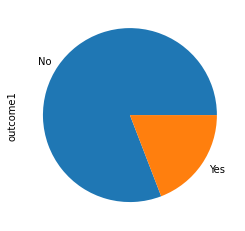

In [6]:
counts = lest['outcome1'].value_counts()
print(counts["No"]/ counts.sum())
counts.plot(kind="pie")

In [7]:
lest=lest.dropna(how='all')
lest2=lest.loc[:, ::2]
lest2['LOS'] = Demo_patient_week1_23['LOS'] 
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,No
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,No
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,No
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,No
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,No


In [8]:
lest2=lest2[lest2['LOS']>6.0]
lest2.head()

,patient_id,protein_day0,protein_day1,protein_day2,protein_day3,protein_day4,protein_day5,protein_day6,protein_day7,outcome1,LOS
0,9A4D778B26BA,0.282150,0.684000,0.684000,0.684000,0.684000,0.740758,0.480000,0.480000,No,18.0
1,243B4074C224,1.008410,1.285744,1.661538,1.047385,1.467692,1.476923,1.476923,1.476923,No,9.0
5,D828BFCA4FA8,1.059200,1.536000,1.536000,1.434667,1.536000,1.536000,1.536000,1.536000,No,23.0
7,90A06A5C6514,0.788889,1.600000,1.600000,1.600000,1.600000,1.273333,0.000000,0.000000,No,26.0
8,B6730734CB50,0.541177,0.677647,0.677647,0.677647,0.677647,0.732549,0.903529,0.903529,No,8.0


In [9]:
lest2.iloc[:, :9].head()

,patient_id,protein_day0,protein_day1,protein_day2,protein_day3,protein_day4,protein_day5,protein_day6,protein_day7
0,9A4D778B26BA,0.282150,0.684000,0.684000,0.684000,0.684000,0.740758,0.480000,0.480000
1,243B4074C224,1.008410,1.285744,1.661538,1.047385,1.467692,1.476923,1.476923,1.476923
5,D828BFCA4FA8,1.059200,1.536000,1.536000,1.434667,1.536000,1.536000,1.536000,1.536000
7,90A06A5C6514,0.788889,1.600000,1.600000,1.600000,1.600000,1.273333,0.000000,0.000000
8,B6730734CB50,0.541177,0.677647,0.677647,0.677647,0.677647,0.732549,0.903529,0.903529


<AxesSubplot:>

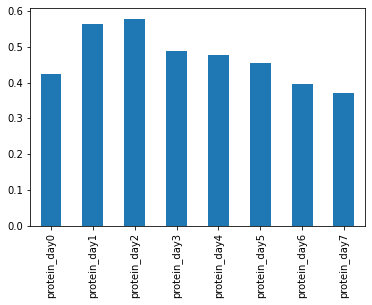

In [10]:
lest2.iloc[:, :9].mean().plot(kind='bar')

<AxesSubplot:>

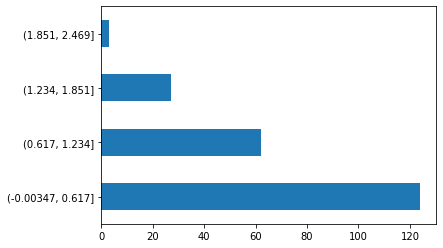

In [11]:
lest2['protein_day2'].value_counts(bins=4).plot(kind='barh')

In [12]:
lest2[lest2['protein_day2']==0].head()

,patient_id,protein_day0,protein_day1,protein_day2,protein_day3,protein_day4,protein_day5,protein_day6,protein_day7,outcome1,LOS
13,1619E2959E25,0.223682,0.218109,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Yes,7.0
14,25474DC11058,0.544533,0.000000,0.0,0.884538,1.149580,1.149580,0.236302,0.000000,Yes,11.0
16,645251FEF8DC,0.307429,0.096381,0.0,0.653150,1.459101,1.013761,0.967666,0.761003,No,11.0
32,88B8DD38379E,0.209524,0.196571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,No,19.0
34,15C496FCD7B6,0.705691,0.534634,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,No,17.0


<AxesSubplot:>

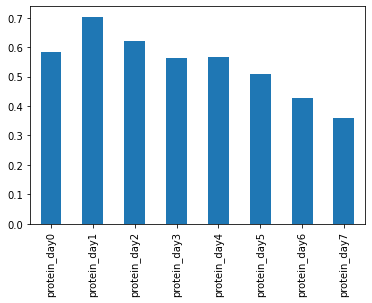

In [13]:
lest2[lest2['outcome1']=='Yes'].iloc[:, :9].mean().plot(kind='bar')

<AxesSubplot:>

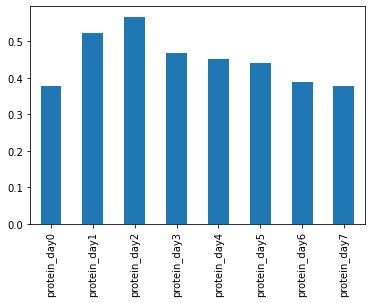

In [14]:
lest2[lest2['outcome1']=='No'].iloc[:, :9].mean().plot(kind='bar')

<AxesSubplot:>

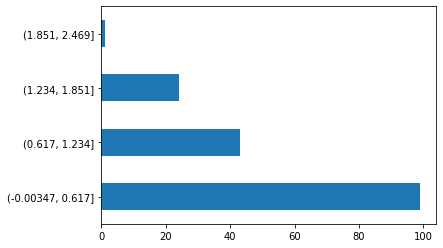

In [15]:
lest2[lest2['outcome1']=='No'].iloc[:, 3].value_counts(bins=4).plot(kind='barh')

<AxesSubplot:>

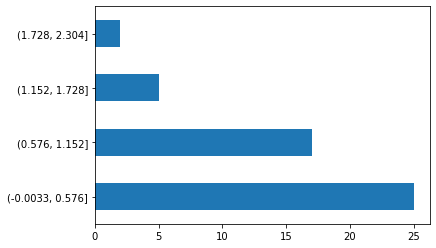

In [16]:
lest2[lest2['outcome1']=='Yes'].iloc[:, 3].value_counts(bins=4).plot(kind='barh')

In [17]:
lest = lest.dropna(how='all')

In [18]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
lest0 = clean_dataset(lest)
lest0.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,No
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,No
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,No
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,No
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,No


In [19]:
lest0["outcome1"].replace({"No" : 0, "Yes" : 1}, inplace=True)
ids = lest0["patient_id"]
lest0.drop("patient_id", axis=1, inplace=True)
print(lest0.head())

   kcal_day0  protein_day0  kcal_day1  protein_day1  kcal_day2  protein_day2  \
0   5.296500      0.282150  12.840000      0.684000  12.840000      0.684000   
1  15.126154      1.008410  19.286154      1.285744  24.923077      1.661538   
2  11.976238      0.798416   0.000000      0.000000  13.462482      0.656720   
3  14.840000      0.560000   3.965647      0.149647   0.432314      0.016314   
4  15.916955      0.575284  27.813581      1.381852  27.088483      1.434327   

   kcal_day3  protein_day3  kcal_day4  protein_day4  kcal_day5  protein_day5  \
0  12.840000      0.684000  12.840000      0.684000  15.654583      0.740758   
1  15.710770      1.047385  22.015385      1.467692  22.153846      1.476923   
2  18.596650      1.239777   6.366770      0.424451   0.000000      0.000000   
3   0.000000      0.000000   0.000000      0.000000   0.000000      0.000000   
4  28.155231      1.094881   6.178284      0.233143   0.000000      0.000000   

   kcal_day6  protein_day6  kcal_day7 

 # Feature Engeneering

In [ ]:
X = lest0.drop("outcome1", axis=1)
y = lest0["outcome1"]

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## KNN

In [21]:
knn = KNeighborsClassifier(80)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', score)
# y_prob = knn.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
# y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
# print("Train score before PCA",knn.score(X_train,y_train),"%")
# print("Test score before PCA",knn.score(X_test,y_test),"%")

Accuracy : 0.8051948051948052


## Decision tree

In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.5974025974025974
Accuracy: 0.5974025974025974


In [23]:
# tree.plot_tree(clf) 

## PCA

[5.54100280e-01 1.50247915e-01 1.06385255e-01 7.83979730e-02
 4.46031984e-02 2.78601658e-02 1.88541417e-02 1.16696406e-02
 7.63807986e-03 1.68126826e-04 3.51177907e-05 1.58948162e-05
 1.00629070e-05 5.49744156e-06 4.39744346e-06 2.59070559e-06
 1.66245927e-06]


Text(0.5, 1.0, 'Features and their usefulness')

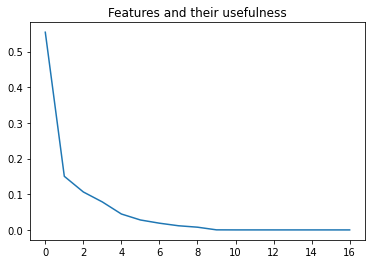

In [24]:
pca_visual = PCA()
X_train_visual = pca_visual.fit_transform(X_train)
X_test_visual = pca_visual.transform(X_test)
fit_visual = pca_visual.fit(X)
print(fit_visual.explained_variance_ratio_)
plt.plot(fit_visual.explained_variance_ratio_)
plt.title("Features and their usefulness")

It seems like that from 9 there is no improvment, so ill try using from 4 to 9 

In [25]:
pca = PCA(n_components=4)
saveX_train = X_train
saveX_test = X_test
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
fit = pca.fit(X)
# summarize components
print(fit.explained_variance_ratio_)

[0.55410028 0.15024792 0.10638526 0.07839797]


## Knn with pca 

In [26]:
knn = KNeighborsClassifier(80)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', score)

Accuracy : 0.8051948051948052


## Decision tree with pca

In [27]:
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X_train, y_train)

print(clf2.score(X_test,y_test))
y_pred = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.7142857142857143
Accuracy: 0.7142857142857143


[Text(233.0922169811321, 210.645, 'X[2] <= 15.694\ngini = 0.311\nsamples = 306\nvalue = [247, 59]'),
 Text(157.9245283018868, 197.055, 'X[13] <= 1.572\ngini = 0.226\nsamples = 177\nvalue = [154, 23]'),
 Text(141.7811320754717, 183.465, 'X[16] <= 14.5\ngini = 0.212\nsamples = 174\nvalue = [153, 21]'),
 Text(126.33962264150945, 169.875, 'X[15] <= 1.497\ngini = 0.271\nsamples = 124\nvalue = [104, 20]'),
 Text(120.7245283018868, 156.285, 'X[2] <= 9.32\ngini = 0.261\nsamples = 123\nvalue = [104, 19]'),
 Text(95.45660377358492, 142.695, 'X[16] <= 9.5\ngini = 0.331\nsamples = 86\nvalue = [68, 18]'),
 Text(67.3811320754717, 129.10500000000002, 'X[13] <= 1.332\ngini = 0.254\nsamples = 67\nvalue = [57, 10]'),
 Text(61.76603773584906, 115.515, 'X[16] <= 3.5\ngini = 0.236\nsamples = 66\nvalue = [57, 9]'),
 Text(50.53584905660378, 101.925, 'X[3] <= 0.362\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(44.920754716981136, 88.33500000000001, 'X[9] <= 0.208\ngini = 0.34\nsamples = 23\nvalue = [1

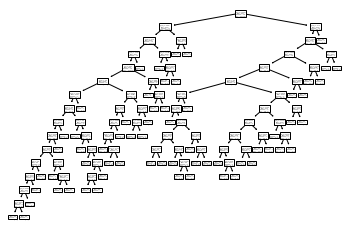

In [28]:
tree.plot_tree(clf) 

In [29]:
X_train = saveX_train
X_test = saveX_test

## T-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 306 samples in 0.000s...
[t-SNE] Computed neighbors for 306 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 306 / 306
[t-SNE] Mean sigma: 7.460830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.298447
[t-SNE] KL divergence after 300 iterations: 0.567015
(306, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

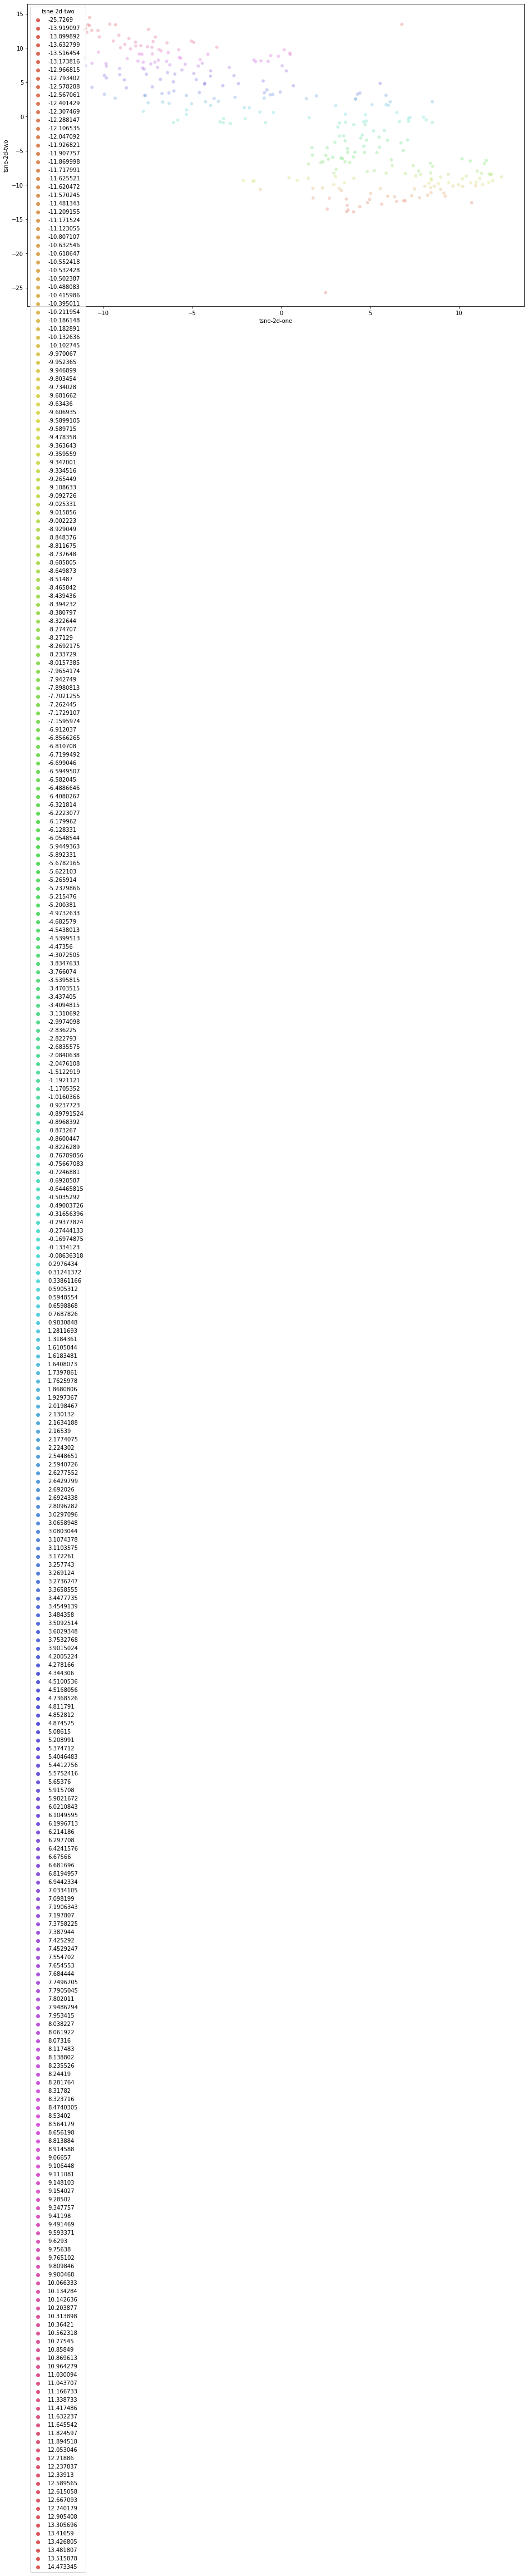

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)
print(tsne_results.shape)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="tsne-2d-two",
    palette=sns.color_palette("hls", 306),
    data=df_subset,
    legend="full",
    alpha=0.3
)